In [1]:
# purpose of this is to see whether a simple neural network is able to learn the relationship between binary encoded and one-hot encoded vectors
# this should be easy as conversion from binary format to decimal format is basically weigthed sum of the bits
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.layers import LSTM, SimpleRNN, GRU
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import math

Using TensorFlow backend.


In [2]:
max_number = 5000

# calculate how many bits are necessary for encoding such amount of unique tokens
num_bits = math.ceil(math.sqrt(max_number))

x_integers = np.arange(max_number).reshape(-1,1)

In [3]:
# encode array of integer sequences (category ids) to binaray encoding (5 = 101)
# this is an alternative to one-hot-encoding
def binary_system_encode(idx_np_array, num_bits):
    # https://stackoverflow.com/a/22227898/9123190
    return (((idx_np_array[:,:,None] & (1 << np.arange(num_bits)))) > 0).astype(int)

# reverse opeation to binary encoding. from binary encoded sequences to category indentifiers
def binary_system_decode(binary_encoded_array):
    # https://stackoverflow.com/a/15506055/9123190
    return binary_encoded_array.dot(1 << np.arange(binary_encoded_array.shape[-1]))

# predictions of binary vectors [0.43 0.93 0.07 0.66 0.42 0.89 0.00]
# transformed to vectors looking like binary representation base od threshold [0 1 0 1 0 1 0]
def predictions_to_binary(preds, threshold=0.5):
    return np.where(preds > threshold, 1, 0)

In [4]:
#encode the input categories to binary encoding
x = binary_system_encode(x_integers, num_bits=num_bits)
#encode the input categories to binary encoding
y = to_categorical(x_integers, num_classes=max_number)

In [5]:
x.shape

(5000, 1, 71)

In [6]:
y.shape

(5000, 5000)

In [7]:
model = Sequential()
model.add(GRU(32, input_shape=(1,num_bits,)))
model.add(Dense(max_number, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='Adam')

model.summary()

hist = model.fit(x, y, batch_size=int(max_number/10), epochs=500)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (None, 32)                9984      
_________________________________________________________________
dense_1 (Dense)              (None, 5000)              165000    
Total params: 174,984
Trainable params: 174,984
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
5000/5000 [==============================] - 2s 335us/step - loss: 8.5232
Epoch 2/500
5000/5000 [==============================] - 1s 117us/step - loss: 8.5093
Epoch 3/500
5000/5000 [==============================] - 1s 117us/step - loss: 8.4994
Epoch 4/500
5000/5000 [==============================] - 0s 94us/step - loss: 8.4873
Epoch 5/500
5000/5000 [==============================] - 0s 92us/step - loss: 8.4717
Epoch 6/500
5000/5000 [==============================] - 0s 91us/step - loss: 8.45

5000/5000 [==============================] - 0s 98us/step - loss: 3.3485
Epoch 89/500
5000/5000 [==============================] - 0s 99us/step - loss: 3.3076
Epoch 90/500
5000/5000 [==============================] - 0s 98us/step - loss: 3.2669
Epoch 91/500
5000/5000 [==============================] - 0s 100us/step - loss: 3.2268
Epoch 92/500
5000/5000 [==============================] - 0s 100us/step - loss: 3.1871
Epoch 93/500
5000/5000 [==============================] - 0s 97us/step - loss: 3.1480
Epoch 94/500
5000/5000 [==============================] - 1s 103us/step - loss: 3.1093
Epoch 95/500
5000/5000 [==============================] - 0s 97us/step - loss: 3.0710
Epoch 96/500
5000/5000 [==============================] - 1s 106us/step - loss: 3.0331
Epoch 97/500
5000/5000 [==============================] - 1s 103us/step - loss: 2.9959
Epoch 98/500
5000/5000 [==============================] - 1s 101us/step - loss: 2.9589
Epoch 99/500
5000/5000 [==============================] - 0s 

5000/5000 [==============================] - 1s 167us/step - loss: 1.0760
Epoch 182/500
5000/5000 [==============================] - 1s 197us/step - loss: 1.0639
Epoch 183/500
5000/5000 [==============================] - 1s 191us/step - loss: 1.0520
Epoch 184/500
5000/5000 [==============================] - 1s 152us/step - loss: 1.0401
Epoch 185/500
5000/5000 [==============================] - 1s 108us/step - loss: 1.0285
Epoch 186/500
5000/5000 [==============================] - 1s 113us/step - loss: 1.0170
Epoch 187/500
5000/5000 [==============================] - 1s 112us/step - loss: 1.0057
Epoch 188/500
5000/5000 [==============================] - 1s 118us/step - loss: 0.9946
Epoch 189/500
5000/5000 [==============================] - 1s 109us/step - loss: 0.9836
Epoch 190/500
5000/5000 [==============================] - 1s 115us/step - loss: 0.9727
Epoch 191/500
5000/5000 [==============================] - 1s 108us/step - loss: 0.9620
Epoch 192/500
5000/5000 [=====================

5000/5000 [==============================] - 1s 107us/step - loss: 0.4306
Epoch 275/500
5000/5000 [==============================] - 1s 110us/step - loss: 0.4270
Epoch 276/500
5000/5000 [==============================] - 1s 106us/step - loss: 0.4234
Epoch 277/500
5000/5000 [==============================] - 1s 105us/step - loss: 0.4199
Epoch 278/500
5000/5000 [==============================] - 1s 103us/step - loss: 0.4164
Epoch 279/500
5000/5000 [==============================] - 1s 108us/step - loss: 0.4129
Epoch 280/500
5000/5000 [==============================] - 1s 105us/step - loss: 0.4095
Epoch 281/500
5000/5000 [==============================] - 1s 107us/step - loss: 0.4062
Epoch 282/500
5000/5000 [==============================] - 1s 105us/step - loss: 0.4028
Epoch 283/500
5000/5000 [==============================] - 1s 128us/step - loss: 0.3995
Epoch 284/500
5000/5000 [==============================] - 1s 110us/step - loss: 0.3963
Epoch 285/500
5000/5000 [=====================

5000/5000 [==============================] - 1s 103us/step - loss: 0.2157
Epoch 368/500
5000/5000 [==============================] - 1s 117us/step - loss: 0.2143
Epoch 369/500
5000/5000 [==============================] - 1s 102us/step - loss: 0.2129
Epoch 370/500
5000/5000 [==============================] - 1s 107us/step - loss: 0.2115
Epoch 371/500
5000/5000 [==============================] - 1s 109us/step - loss: 0.2101
Epoch 372/500
5000/5000 [==============================] - 1s 135us/step - loss: 0.2087
Epoch 373/500
5000/5000 [==============================] - 1s 119us/step - loss: 0.2074
Epoch 374/500
5000/5000 [==============================] - 1s 129us/step - loss: 0.2060 0s - loss: 0.2
Epoch 375/500
5000/5000 [==============================] - 1s 165us/step - loss: 0.2047
Epoch 376/500
5000/5000 [==============================] - 1s 210us/step - loss: 0.2033
Epoch 377/500
5000/5000 [==============================] - 1s 161us/step - loss: 0.2020
Epoch 378/500
5000/5000 [======

Epoch 460/500
5000/5000 [==============================] - 1s 138us/step - loss: 0.1225
Epoch 461/500
5000/5000 [==============================] - 1s 144us/step - loss: 0.1218
Epoch 462/500
5000/5000 [==============================] - 1s 140us/step - loss: 0.1211
Epoch 463/500
5000/5000 [==============================] - 1s 136us/step - loss: 0.1205
Epoch 464/500
5000/5000 [==============================] - 1s 123us/step - loss: 0.1198
Epoch 465/500
5000/5000 [==============================] - 1s 127us/step - loss: 0.1191
Epoch 466/500
5000/5000 [==============================] - 1s 123us/step - loss: 0.1185
Epoch 467/500
5000/5000 [==============================] - 1s 131us/step - loss: 0.1178
Epoch 468/500
5000/5000 [==============================] - 1s 124us/step - loss: 0.1171
Epoch 469/500
5000/5000 [==============================] - 1s 136us/step - loss: 0.1165
Epoch 470/500
5000/5000 [==============================] - 1s 148us/step - loss: 0.1159
Epoch 471/500
5000/5000 [=======

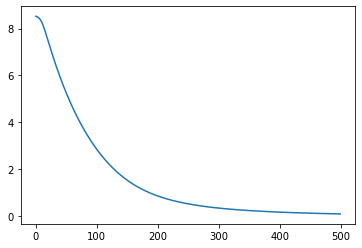

In [8]:
plt.plot(hist.history['loss'])
plt.show()

In [9]:
number = 5
np.argmax(model.predict(x[number:number+1]))

5